# Alcohol Pharmacokinetics and  Blood Alcohol Content % Modeling

Prepared by: Phuong Cao - tcao2@nd.edu and Cleveland Keal - ckeal@nd.edu

Team 10

Based on Problem 6-7b of Fogler, H. S. (2006). 6. In Elements of chemical reaction engineering (3rd ed., pp. 323–324). essay, Prentice-Hall of India. ISBN 978-0135317082


## Problem Description
This problem is meant to provide practice for undergraduate students in using coding to model and understand chemical engineering reaction kinetics and have a better understanding of the kinetics of alcohol in the body.

Aditionaly, doing this project is a chance to learn and practice solving ODE equation.

After working on this project, the students also be more familier using Numpy library which help in constructing array, matrix, and multiple mathematics functions, Scipi library which help in solving integral function more efficiently in this project, and Matplotlib which provides visualization when they graph. 

**Useful links to review library**
1. Numpy

    https://ndcbe.github.io/data-and-computing/notebooks/01/NumPy.html?highlight=numpy#getting-started-with-numpy-arrays

2. Scipy 

    https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html

    https://ndcbe.github.io/data-and-computing/notebooks/04/Linear-Algebra-in-Numpy.html?highlight=scipy#scipy
    
3. Matplotlib

    https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html#matplotlib-basics

    https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html#customizing-plots
    
    https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html#plotting-multiple-lines

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Background: Modeling Blood Alcohol Content %

Pharmacokinetics concerns the ingestion, distribution, reaction, and elimination reaction of drugs in the body. Consider the application of pharmacokinetics to a common American passtime, drinking.

One of the most commonly ordered drinks is a martini, therefore we shall  model changes in Blood alcohol %  after having a given amount of tall martinis.

Blood Alcohol Content % (BAC) is a percent value of grams of alcohol per liters of blood, and can be modelded by determining:
* The amount of alcohol ingested
* the rate you drink the alcohol
* How long it takes for the alcohol to leave the intestine and enter the bloodstream.
* how long it takes for your body to break down the alcohol

We will be using Ordinary Differential Equations (ODEs) to find the kinetics

Some important info to solve these problems are: 


*   Blood Volume(L) is about 8% of the body's weight (kg)
*   A tall martini is 150mL and is 30% ABV (Alcohol by Volume)
*   The density of alcohol is 789 kg/L
*   The legal limit in the U.S. is 0.08% or 0.8 g alcohol per Liter of blood




## Analysis

### 1A Calculating Alcohol Ingestion

 
 Make a function that determines the total amount of alcohol one will drink in a given "session" based on martinis drank and body weight.

**Watch your units!**


This function helps to etermine the initial alcohol concentration in the intestine based on number of tall martinis drank and body weight(kg)

In [3]:
def drinks(m,n):
  ''' Determines the initial alcohol concentration in the intestine based on 
  # of tall martinis drank and body weight(kg)
    Args:
	      n: number of martinis drank
	      m: Body weight (kg)
    Returns:
        CT: The total amount concentration of alcohol ingested, 
      Ca0 for the differential equation
        '''     
  
  # add your solution here
  # Add your solution here
 
  CT = g_alcohol/L_blood

  return CT

### 1B. ODE Equations


The Pharmacokinetics of alcohol involves 3 reactions occuring:

__1. Rate of alcohol injestion (how fast one drinks or how fast the alcohol enters ones stomach)__

\begin{equation}
r_0 ≈ -k_0 \left[ C_0 \right]t
\end{equation} 
rate of injestion into the gastrointestinal tract is a first-order reaction with a specific reaction rate constant of about 10 h-L (h-L is hour litter blood)

__2. Rate of alcohol distribution (how fast the alcohol leaves ones stomach and enters the bloodstream)__
\begin{equation}
r_1 = -r_0-k_1 \left[ C_A \right]
\end{equation}
rate of absorption from the gastrointestinal tract into the bloodstream and body is a first-order reaction with a specific reaction rate constant of 10 h-L (h-L is hour litter blood)

__3. Rate of alcohol elimination (how fast the breaks down after entering the bloodstream)__
\begin{equation}
r_2 = -r_1 - k_2
\end{equation}
The rate at which ethanol is broken down in the bloodstream is limited by regeneration of a coenzyme. Consequently, the process may be modeled as a zero-order reaction with a specific reaction rate of 1.92 g/h-L of blood.


Make a function that sets up the ODE solver for alcohol entering the stomach(dC0/dt) leaving the intestine (dCa/dt), entering the blood and being broken down (dCb/dt), Then turn it into Blood alcohol % (dBAC/dt) 

Derive a formula to find Ca, Cb, and BAC using the rate laws, turn in the written work into **Gradescope** 

Hint: You dont need to use r0 when deriving dCb/dt

* [Scipy reaction rate help](https://ndcbe.github.io/data-and-computing/notebooks/07/Example-Reaction-Rates.html)
* [Scipy.integrate help](https://docs.scipy.org/doc/scipy/reference/integrate.html#)


In [4]:
def f(t, y):
    ''' RHS of differential equation for reaction kinetics
    Args:
        t: time
        y: values for differential questions, [CA, CB, BAC]
    Returns:
        dydt: first derivation of y w.r.t. t
    
    '''
    # unpack current values of y
    C0,CA, CB, BAC = y      
    
   # dC0 rate constant.
    # if statment added so models dont go below 0 
    if C0 <= 0:
      k0 = 0  
    else:
      k0 = 10 * t #1/h
  
   # dCa rate constant 
    k1 = 10 #1/h

    # dCb and dBAC rate constant
    # if statment added so models dont go below 0
    if BAC <= 0:
      k2 = 0 
    else:
      k2 = 1.92  #g/hL
    
    #Store equations as a list in the variable dydt
    
    # Add your solution here  
    # Add your solution here
    dydt = dC0,dCA,dCB,dBAC
    
    return dydt


Discuss in 3-5 sentences what theses ODEs say about the Pharmacokinetics of alcohol.


**Discussion:**

### 1C. BAC modeling: Sobering up



This function solves the ODE for dCa/dt, dCb/dt, and dBAC/dt that you made in part 1B.

**Its important to note that this ODE assumes that a person of "m" weight  drinks "n" number of drinks on a moderatley full stomach at a given rate then stops.**

In [5]:
def SolveODE(CT,tmax,f):

  ''' Solves differential equation for reaction kinetics
    Args:
        CT: initial concentration of C0
        tmax: the amount of time passed/ the x value of the model 
        f: the Setup function for the solver
    Returns:
        C0: Concentration profile of alcohol in the stomach
        CA: Concentration profile of alcohol in the intestine
        CB: Concentration profile of alcohol in the blood
        BAC: % value of CB
    
    '''
# Initial values
  C00 = CT
  CA0 = 0.0
  CB0 = 0.0 
  BAC0 = 0.0
  
# Bundle initial conditions for ODE solver
  y0 = [C00,CA0, CB0, BAC0]
  t = np.arange(0, tmax, 0.1)
  tspan = [np.min(t), np.max(t)]
 
# Call the ODE solver
  soln = integrate.solve_ivp(f, tspan, y0, t_eval=t, method='RK23')

# print(soln)
  C0 = soln.y[0]
  CA = soln.y[1]
  CB = soln.y[2]
  BAC = soln.y[3]

  return C0,CA,CB,BAC,t
 


This function puts it all together and places the model info into an array.

In [6]:
def Model_info (n,m,tmax):
  ''' Puts the previous functions together, 
      puts the information into a single variable array
    Args:
        n: number of martinis drank
	      m: Body weight (kg)
        tmax: the amount of time passed/ the x value of the model 
        
    Returns:
        S: The list array of information 
  '''
  Cai = drinks(m,n)
  S = SolveODE(Cai,tmax,f)
  return S


A 75kg person drinks 2 tall martinis over the course of an hour (as determined by k0). How long must they wait to drive after the hour of drinking You can do this just by modeling **Ca and BAC or C0 and BAC**. Remember, In most states the legal intoxication limit is 0.08% Blood Alcohol Content (BAC) or 0.8g ethanol for every liter of blood. **Plot the model using a twin axis.
* [Twin axis plot help](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)
* [Matplotlib help](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html?highlight=matplotlib)

*Hint: variable "C" is a list containing all of the information you need.*

Extra credit: Make 2 twin axis plots. One for Ca and BAC and one for C0 and BAC*

**Answer (after plotting):**

0.0954929536223611




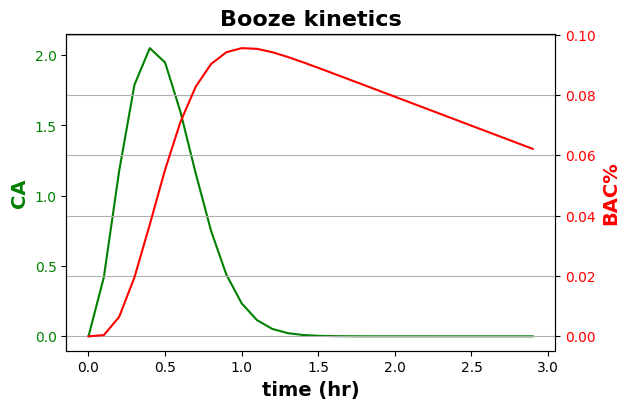

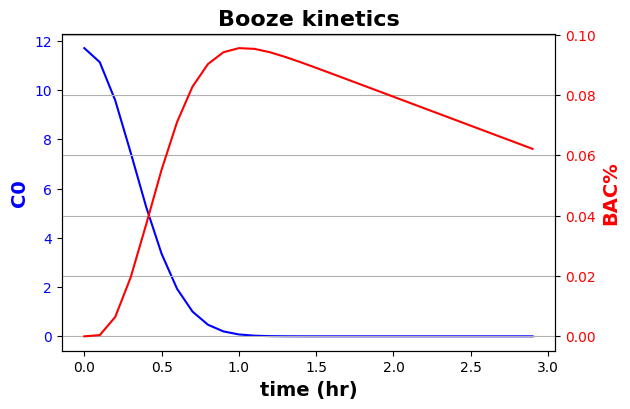

In [33]:
 # You can change tmax(3) here
C = Model_info(2,75,3)

 # Add your solution here
 # Add your solution here

Using the plotted kinetics **Discuss in 3-6 sentences** how long it takes for alcohol to enter the blood stream vs how long it takes for the alcohol to break down. How would BAC change over time if the person weighed more/less? If they drank more/less?


**Discussion:**

### 2A. Alcohol Poisoning

[According to the Cleveland Clinic](https://my.clevelandclinic.org/health/diagnostics/22689-blood-alcohol-content-bac#:~:text=BAC%200.30%25%20to%200.40%25%3A,arrest%20(absence%20of%20breathing).)(No relation), Alcohol Poisoning occurs when you have a Blood Alcohol Content above 0.3%, at that point you start Blacking out and have a potentially lethal amount of alcohol in your blood. Another commonly ordered drink is a shot, which is about 45mL and 40ABV.
Therefore, we're going to model how many shots one can drink before poisoning themself. 




Rework, the drinks function to calculate Cai for shots

In [ ]:
def drinks(m,n):
  ''' Determines the initial alcohol concentration in the intestine based on 
  # of tall martinis drank and body weight(kg)
    Args:
	      n: number of martinis drank
	      m: Body weight (kg)
    Returns:
       CT: The total amount concentration of alcohol ingested, 
      Ca0 for the differential equation
        '''
  # add your solution here
  # Add your solution here

  return CT

### 2B. Alcohol Poisoning Modeling

Use the ODE models and kinetics plots to determine how many shots a 60kg person can drink before getting alcohol poisoning *assuming they drink all of the shot within an hour*

*Hint: plots and code can be reused*

**Answer (after graphing):**

0.7779908086843336




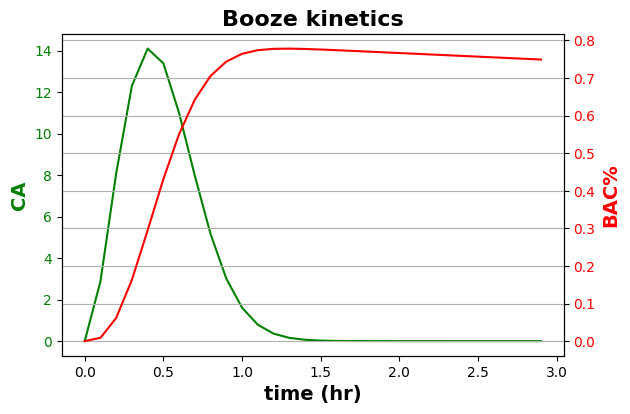

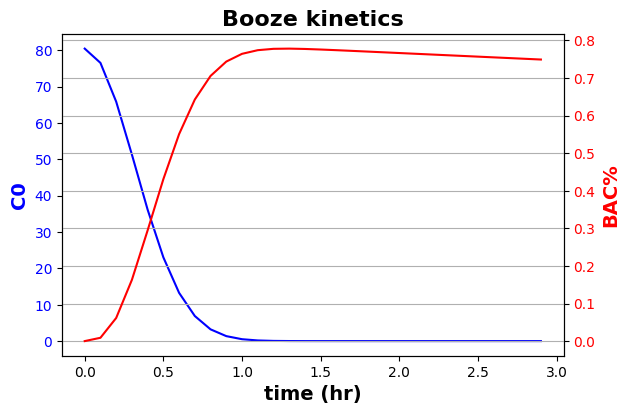

In [34]:
 # Change n,m and tmax here
C = Model_info(11,60,3)

 # Add your solution here
 # Add your solution here

Some people can develop a tolerance to alcohol. So  they may not feel the same  effects of alcohol even after drinking the same amount they used to drink. This doesn’t mean their BAC is lower. It just means they experience the effects of alcohol differently.

Discuss, in 3-5 sentences, why that might be the case, and why weight does affect ones BAC.

**Discussion:**

### 3A. Pharmacokinetics factors

Given what you now know about how BAC changes over time and how weight and number of drinks affect those kinetics, we will now explore other factors that affect those kinetics

1. The rate at which one drinks (k0)
2. How much one eats before drinking (k1)

  "Thus, alcohol consumed after a heavy meal is released to the duodenum
slowly, reducing the rate of absorption and thereby attenuating the subsequent blood alcohol curve." 

  *Source:(Gentry, R.T. (2000), Effect of Food on the Pharmacokinetics of Alcohol Absorption. Alcoholism: Clinical and Experimental Research, 24: 403-404. https://doi.org/10.1111/j.1530-0277.2000.tb01996.x)*


Change the "f" function to account for someone drinking faster/slower and having more/less food in ones stomach before drinking and model how that affects the BAC over time *under the same n and m values*. **Discuss those effects in 3-5 sentences.**

In [ ]:
def f(t, y):
    ''' RHS of differential equation for reaction kinetics
    Args:
        t: time
        y: values for differential questions, [CA, CB, BAC]
    Returns:
        dydt: first derivation of y w.r.t. t
    
    '''
    # unpack current values of y
    C0,CA, CB, BAC = y      
  
   # dC0 rate constant. 
   #How fast is one drinking? Define parameters here
    if C0 <= 0:
      k0 = 0 #1/h
    else:
      k0 = 10 * t #1/h

   # dCa rate constant.
   #How much did one eat? Define parameters here
    k1 = 10 #1/h
    # dCb and dBAC rate constant
    # if statment added so they dont go below 0
    if BAC <= 0:
      k2 = 0 #g/hL
    else:
      k2 = 1.92  #g/hL
    
    #Store equations as a list in the variable dydt
    
    # Add your solution here  
    # Add your solution here

    return dydt

0.15489696767904365




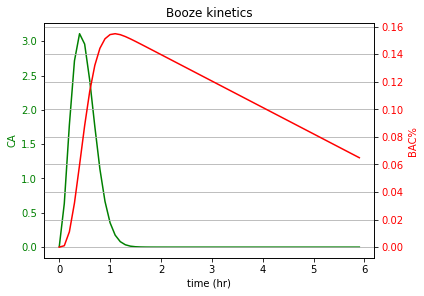

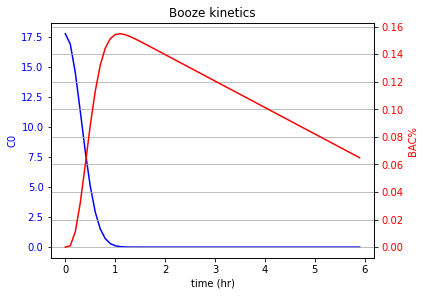

In [ ]:
 #add input values into the function
C = Model_info(10,100,6)

# Add your solution here
# Add your solution here

### 3B. Final Discussion
Given what you now know about how BAC changes over time and what affects those changes. Discuss in 1-3 sentences how your BAC will/wont change over the various scenarios:


1. Drank on an empty stomach
2. One drank everything over the course of 5 hours instead of all at once
3. You drank water in between drinks **But drinks at the same rate** (*Trick Question: Water doesnt nessecarily change your BAC, it just stops you from drinking too much too fast*)


Even if the amount one drinks doesnt change.


**Discussion:**

Reminder: Drink Responsibly!